## Inteligență Artificială  Laboratorul 1 : Introducere în Python


- Cătălin Chiru: <cata.chiru99@gmail.com>
- Mihai Nan: <mihai.nan@upb.ro>


Conținuturi:
* liste
* dicționare
* numpy
* funcții
* tupluri

# <u> Tutorial [20p] </u>

# <u> Importuri </u>

Importurile sunt descarcate utilizand pip, un sistem de management al pachetelor pentru Python.

---
**Observație**:

Nu este necesar sa rulati instalarea importurilor la fiecare rulare a notebook-ului. Ele sunt deja instalate in mediu.

De aceea, acestea sunt adesea pozitionate la inceputul notebook-ului.

___


In [2]:
!pip install functools
!pip install pickle
!pip install numpy #numpy==1.16.1 (Anumite pachete au nevoie de compatibilitatea versiunilor,
                   #               în comentarii am specificat modul prin care putem forța instalarea unei versiuni specifice)

!pip install unidecode
!pip install pandas
!pip install copy

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for functools
  Running setup.py clean for functools
Failed to build functools
ERROR: Could not build wheels for functools, which is required to install pyproject.toml-based projects
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
ERROR: Could not find a version that satisfies the requirement copy (from versions: none)
ERROR: No matching distribution found for copy


Putem sa importam fie un intreg modul, fie doar functiile sau clasele din acel modul pe care dorim sa le folosim (Opțiune aleasă din considerente de memorie și lizibilitate a codului).  


In [4]:
from functools import reduce
import re
from unidecode import unidecode
import pickle as pkl # Putem folosi aliasuri pentru a scurta numele unor module utilizate
import numpy as np
import pandas as pd
from copy import deepcopy

# <u> Variabile </u>

In [5]:
var = 5

În cadrul modulelor de deep learning, o prima etapă a debuggingului în cazul erorilor din timpul rulării programului (`Runtime Errors`) o reprezintă printarea tipurilor de date curente și așteptate.

In [6]:
type(var) # Intoarce tipul cel mai general care poate fi inferat din variabila

int

Pentru o mai buna vizibilitate, putem tipa variabilele:

In [7]:
var : int = 5

type(var)

int

Însă, python este suficient de permisiv și nu va produce erori dacă tipul variabilei nu concordă, căutând să convertească tipul variabilei la cel mai general tip care face matching cu toate elementele listei:

In [8]:
var2 : int = "abc"

type(var2)

str

___
**Observație:** Celulele unui Jupyter Notebook sunt executate de obicei într-o maniera top-down, iar datele calculate sau variabilele definite într-o celulă sunt păstrate local, în memoria notebook-ului și sunt disponibile în celulele ulterioare din cadrul aceluiași document.

Acest comportament permite utilizatorilor să acceseze și să reutilizeze rezultatele sau variabilele definite anterior.

Aveți mare grijă în momentul în care faceți debugging în celule inferioare celulei unde vă efectuați workflow-ul curent la efectele laterale pe care le produceți asupra variabilelor de interes.

---

In [9]:
# Putem accesa variabila "var", care a fost definita mai sus
var + 2

7

# <u> Printare </u>

După cum ați putut observa, în cadrul celulelor de Jupyter Notebook există o manieră implicită de a printa o variabilă sau rezultatul unei funcții, plasând-o la sfârșitul celulei, în afara unei definiții (similar comportamentului Matlab studiat la MN)

O manieră explicită prin care putem printa, oriunde în interiorul celulei se realizează utilizând funcția "print" și modurile sale de formatare introduse o dată cu Python3.X

In [10]:
print("Variabila de mai sus:", var, "printată de la începutul celulei")

nume = "Mărie"

var_float = 0.0123

print("Aceeași {}: valoarea {}".format(nume, var_float))

# f din fața stringului esete un macro pentru apelarea cu variabile in-place a funcției de formatare
print(f"Aceeași {nume}: valoarea {var_float}")

print(f"Aceeași {nume} cu altă pălărie: valoarea {var_float:.2e}")

Variabila de mai sus: 5 printată de la începutul celulei
Aceeași Mărie: valoarea 0.0123
Aceeași Mărie: valoarea 0.0123
Aceeași Mărie cu altă pălărie: valoarea 1.23e-02


  Observăm că, prin folosirea indicației `{:2e}` am determinat printarea `var_float` în format stiințific, de tip  `mantisă`<mark>e</mark>`exponent`

# <u> Liste  </u>

Echivalentul array-urilor din Java, sau a vectorilor din C++, sunt colecții de elemente.

Datorita sintezei de tipuri din Python, listele pot conține elemente de tipuri diferite, spre deosebire de structurile echivalente din alte limbaje de programare.

Totodată, în Python, string-urile sunt considerate liste de caractere și se pot folosi aceleași operații pe care urmează să le prezentăm + altele specifice string-urilor.

In [11]:
lista_polimorfica = [1, 'string', [1,2,4], None]

In [12]:
lista_int : list[int] = [1, 2, 3, 4, 5]

In [13]:
lista_polimorfica2: list[int] = [1, 'string', [1,2,4], None]

In [14]:
type(lista_polimorfica2) # Aceeași discuție ca în cazul variabilelor

list

### <u> Indexare și slicing </u>

In [15]:
lista_int

[1, 2, 3, 4, 5]

In [16]:
# Listele sunt indexate de la 0

lista_int[0]

1

In [17]:
# Putem folosi indecși negativi pentru a accesa elementele de la sfârșitul listei spre început

lista_int[-1]

5

In [18]:
# Sau putem folosi slice-uri pentru a accesa o porțiune din listă

lista_int[1:4]

[2, 3, 4]

In [19]:
exemplu_string = "Ana are mere"

exemplu_string[0:3]

'Ana'

### <u> Operații cu liste </u>

Operațiile de bază pe care le putem face cu liste sunt:
* stabilirea numarului de elemente din lista - `len(lista)`
* adăugarea unui element la finalul listei - `lista.append(element)`
* adăugarea unui element la o anumită poziție - `lista.insert(index, element)`
* ștergerea unui element de pe o anumită poziție - `lista.pop(index)`
* ștergerea unui element cu o anumită valoare - `lista.remove(element)`
* concatenarea a două liste - `lista1 + lista2`, sau `lista1.extend(lista2)`
* repetarea unui pattern de elemente - `lista * n`

Alte operații mai puțin uzuale, pot fi găsite în [Documentația Python pentru liste](https://docs.python.org/3/tutorial/datastructures.html)

In [20]:
len(lista_int)

5

In [21]:
lista_int.append(6)

lista_int

[1, 2, 3, 4, 5, 6]

---
**Observație**:

Inserarea se face intr-o maniera OOP, asupra obiectului de la referința spre care pointează lista_int.

O eroare comuna este provocata de sintaxa:

<code>
lista_int = lista_int.append(6) - in acest caz, lista_int va deveni None, deoarece lista_int.append(6) returneaza None
</code>

___


In [22]:
lista_int.insert(2, -14)

lista_int

[1, 2, -14, 3, 4, 5, 6]

In [23]:
lista_int.extend([7, 8, 9])

lista_int

[1, 2, -14, 3, 4, 5, 6, 7, 8, 9]

In [24]:
lista_int =  lista_int + [10, 11, 12]
lista_int += [13, 14, 15] # Mod echivalent de concatenare a listelor

lista_int

[1, 2, -14, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [25]:
element_scos = lista_int.pop(2)

element_scos, lista_int # Putem observa ca aceasta sintaxa printeaza la consola un tuplu

(-14, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [27]:
lista_int.remove(7)

lista_int

ValueError: list.remove(x): x not in list

In [28]:
exemplu_string += "." * 3

exemplu_string

'Ana are mere...'

In [29]:
len(lista_int) # O dată cu schimbările asupra listei s-a modificat și lungimea

14

Listele din python suporta si operatii pe care le-ati intalnit la PP, din paradigma functionala, precum `map`, `filter` si `reduce` (echivalentul `fold` din Haskell).

Aceste functii, de obicei returneaza iteratori, pentru a economisi memorie, dar putem sa convertim rezultatele înapoi în liste folosind functia `list`:


In [30]:
lista_int_patrat = list(map(lambda x: x**2, lista_int)) # Observam ca putem folosi functii lambda pentru a defini in-place functii anonime

lista_int_patrat

[1, 4, 9, 16, 25, 36, 64, 81, 100, 121, 144, 169, 196, 225]

In [31]:
# Filtram elementele pare din lista
lista_int_patrat = list(filter(lambda x: x % 2 == 0, lista_int_patrat))

lista_int_patrat

[4, 16, 36, 64, 100, 144, 196]

In [32]:
from functools import reduce # Importam functia reduce din modulul functools

suma_radacinilor = reduce(lambda acc, elem: acc + np.sqrt(elem), lista_int_patrat, 0)

suma_radacinilor

56.0

De asemenea, există conceptul de list comprehension, întâlnit anterior în Haskell. Acest concept oferă o modalitate concisă și expresivă de a crea liste noi prin aplicarea unei expresii la fiecare element al unei secvențe.

Un exemplu simplu ar fi crearea unei liste care conține pătratele primelor zece numere naturale, folosind list comprehension în Python:

In [33]:
patrate_perfecte = [x**2 for x in range(1, 11)]

patrate_perfecte

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

Iată un exemplu mai complex pentru generarea produsului cartezian al două liste.

In [34]:
lista_A = [1, 2, 3]
lista_B = ['a', 'b', 'c', 'd']

produs_cartezian = [(a, b) for a in lista_A for b in lista_B]
produs_cartezian

[(1, 'a'),
 (1, 'b'),
 (1, 'c'),
 (1, 'd'),
 (2, 'a'),
 (2, 'b'),
 (2, 'c'),
 (2, 'd'),
 (3, 'a'),
 (3, 'b'),
 (3, 'c'),
 (3, 'd')]

List comprehension în Python poate include și declarații if, permițând filtrarea elementelor în funcție de o anumită condiție. Iată un exemplu simplu în care se creează o listă cu pătratele numerelor pare de la 1 la 10:

In [35]:
patrate_pare = [x**2 for x in range(1, 15) if x % 2 == 0]

patrate_pare

[4, 16, 36, 64, 100, 144, 196]

### <u> Iterații prin liste </u>

O altă metodă de a itera prin liste este folosind buclele `for` și `while`.

Putem accesa elementele listei folosind indexul acestora, sau putem itera prin toate elementele, folosind instrucțiunea `for`.

In [36]:
# Iteram folosind un index de la 0, pana la lungimea listei
for i in range(len(lista_int)):
    print(lista_int[i])

1
2
3
4
5
6
8
9
10
11
12
13
14
15


In [37]:
i = 0
max_len = len(lista_int)

while i < max_len:
  print(lista_int[i])

  i += 1

1
2
3
4
5
6
8
9
10
11
12
13
14
15


In [38]:
for elem in lista_int:
    print(elem)

1
2
3
4
5
6
8
9
10
11
12
13
14
15


In [39]:
for idx, elem in enumerate(lista_int):
    print(f"Elementul de pe pozitia {idx} este {elem}")

Elementul de pe pozitia 0 este 1
Elementul de pe pozitia 1 este 2
Elementul de pe pozitia 2 este 3
Elementul de pe pozitia 3 este 4
Elementul de pe pozitia 4 este 5
Elementul de pe pozitia 5 este 6
Elementul de pe pozitia 6 este 8
Elementul de pe pozitia 7 este 9
Elementul de pe pozitia 8 este 10
Elementul de pe pozitia 9 este 11
Elementul de pe pozitia 10 este 12
Elementul de pe pozitia 11 este 13
Elementul de pe pozitia 12 este 14
Elementul de pe pozitia 13 este 15


În cazul în care vrem să folosim blocuri de instrucțiuni (for, while, if) imbricate, apartenența codului într-un anumit bloc se face prin nivelul indentării:

In [40]:
# Definim o matrice ca o listă de liste

matrice = [[1,2,3], [4,5,6], [7,8,9], [10,11,12]]

inaltime = len(matrice)
latime = len(matrice[0])

# Vrem sa printam multiplii de 3, patratul numerelor de forma 3k+1, si jumătatea întreagă a numerelor de forma 3k+2
for i in range(inaltime):
  # Se observa ca bucla j este în interiorul buclei for datorită indentării
  for j in range(latime):
    # Analog observam identarea instructiunilor if-else la acelasi nivel, in interiorul ambelor blocuri for
    x = matrice[i][j]
    if x % 3 == 0:
      print(x, end=" ")
    elif x % 3 == 1: # Exista instructiunea elif
      print(x**2, end=" ")
    else:
      print(x//2, end=" ")

  # Observăm că acest print face parte doar din blocul exterior for
  print()

1 1 3 
16 2 6 
49 4 9 
100 5 12 


### <u> Operații cu stringuri </u>

Operațiile de bază pe care le putem efectua cu stringuri sunt:
* conversia în ASCII a literelor - `ord(char)`
* tokenizarea sirului pe baza unui caracter separator - `string.split(separator)`
* reconstruirea textului pe baza tokenilor - `"separator".join(lista_tokeni)`
* convertirea case-ului stringului - `string.upper()`, `string.lower()`, `string.capitalize()`
* găsirea unui subsir într-un string - `string.find(substring)`
* alternativ, verificarea dacă un string conține un anumit subsir - `substring in string`
* înlocuirea unui subsir cu altul - `string.replace(substring, new_substring)`
* ștergerea spațierii de formatare (en. whitespaces) de la începutul și sfârșitul șirului - `string.strip()`
* formatarea unui string - `string.format()` Prezentată anterior la formatarea printării :-)

Alte operații mai puțin uzuale, pot fi găsite în [Documentația Python pentru stringuri](https://docs.python.org/3/library/string.html)

O bibliotecă importantă în preprocesarea textelor pentru analiza limbajului natural (NLP) este reprezentată de "re", funcționalități disponibile prin re, sunt:
* căutarea unui pattern într-un string - `re.search(pattern, string)`
* găsirea tuturor aparițiilor unui pattern într-un string - `re.findall(pattern, string)`
* înlocuirea unui pattern cu altul - `re.sub(pattern, new_pattern, string)`
* tokenizarea unui string pe baza unui pattern - `re.split(pattern, string)`

Avantajul utilizării bibliotecii "re" este reprezentat de posibilitatea identificării unor RegEx-uri, prin `pattern`.

Un link foarte util pentru mai buna înțelegere a RegEx-urilor din re se găsește pe [W3schools](https://www.w3schools.com/python/python_regex.asp).

O altă bibliotecă utilizată în preprocesare, mai ales pentru taskuri în limba română este reprezentată de `unidecode`, care are rolul de a substitui diacritele cu echivalentul lor din alfabetul latin care încape pe un octet.

___
**Observație:** Spre deosebire de metodele aplicate asupra listelor, metodele aplicate stringurilor nu execută modificări in-place, ci produc un nou string care are caracteristicile dorite

---

In [41]:
ord('A')

65

In [42]:
demo_text = "Userii @Cata și @Mihai speră să vă bucurați de acest laborator :D"

In [43]:
lista_cuvinte = demo_text.split(" ")

lista_cuvinte

['Userii',
 '@Cata',
 'și',
 '@Mihai',
 'speră',
 'să',
 'vă',
 'bucurați',
 'de',
 'acest',
 'laborator',
 ':D']

In [44]:
textul_reconstruit = " ".join(lista_cuvinte)

textul_reconstruit

'Userii @Cata și @Mihai speră să vă bucurați de acest laborator :D'

In [45]:
print(demo_text.lower())
print(demo_text.upper())
print(demo_text.lower().capitalize())

userii @cata și @mihai speră să vă bucurați de acest laborator :d
USERII @CATA ȘI @MIHAI SPERĂ SĂ VĂ BUCURAȚI DE ACEST LABORATOR :D
Userii @cata și @mihai speră să vă bucurați de acest laborator :d


In [ ]:
print(f"Rezultatele cautarii unui substring existent in text:", "@Cata" in demo_text, "și indexul la care se găsește:", demo_text.find("@Cata"), "(re: {})".format(re.search("@Cata", demo_text)))
print(f"Rezultatele cautarii unui substring inexistent in text:", "@Catalin" in demo_text, "și indexul la care se găsește:", demo_text.find("@Catalin"), "(re: {})".format(re.search("@Catalin", demo_text)))

Rezultatele cautarii unui substring existent in text: True și indexul la care se găsește: 7 (re: <re.Match object; span=(7, 12), match='@Cata'>)
Rezultatele cautarii unui substring inexistent in text: False și indexul la care se găsește: -1 (re: None)


In [46]:
print(demo_text.replace("laborator", "material"))

print(demo_text) # Deși am făcut replace anterior, demo_text rămâne nemodificat
                 # așa cum am precizat și în observația de mai sus

Userii @Cata și @Mihai speră să vă bucurați de acest material :D
Userii @Cata și @Mihai speră să vă bucurați de acest laborator :D


In [47]:
textul_reconstruit = " " + textul_reconstruit + " "

print(textul_reconstruit)
print(textul_reconstruit.strip())

 Userii @Cata și @Mihai speră să vă bucurați de acest laborator :D 
Userii @Cata și @Mihai speră să vă bucurați de acest laborator :D


In [48]:
# RegEx care indică eliminarea @ și păstrarea numelor
demo_text_fara_useri = re.sub(r'@(\w+)', r'\1', demo_text)

demo_text_fara_useri

'Userii Cata și Mihai speră să vă bucurați de acest laborator :D'

In [49]:
# RegEx care indică eliminarea @user complet
demo_text_fara_useri2 = re.sub(r'@(\w+)', '', demo_text)

demo_text_fara_useri2

'Userii  și  speră să vă bucurați de acest laborator :D'

> Importanța unor astfel de procesări poate consta în anonimizarea persoanelor dintr-un dataset de tweeturi, spre exemplu.

In [50]:
unidecode(demo_text)

'Userii @Cata si @Mihai spera sa va bucurati de acest laborator :D'

# <u> Dictionare  </u>

Asociază o cheie cu o valoare, valoarea putând fi orice obiect Python. Totuși, cheia trebuie să fie un obiect imutabil (hashable), cum ar fi un string, un număr sau un tuplu.

In [51]:
note_dict = {"Mihai": 10, "Andreea": 10, "Andrei": 8, "Marcela": 7, "Rodica": 9, "Catalin": 8}

note_dict

{'Mihai': 10,
 'Andreea': 10,
 'Andrei': 8,
 'Marcela': 7,
 'Rodica': 9,
 'Catalin': 8}

In [52]:
dict_tuples = {(1,2,3): 2, (4,5,6): 5}

In [53]:
dict_lists = {[1,2,3]: 2, [4,5,6]: 5}

TypeError: unhashable type: 'list'

Putem observa că putem construi un dicționar folosind tupluri drept chei, dar nu putem folosi liste, deoarece acestea sunt mutabile.

În ceea ce privește operațiile de bază, dicționarele prezintă următoarele metode:
* adăugarea unei perechi cheie-valoare - `dict[key] = value`
* obținerea valorii asociate unei chei - `dict[key]`
* verificarea existenței unei chei în dicționar - `key in dict`
* ștergerea unei perechi cheie-valoare - `del dict[key]`
* obținerea unei liste cu toate cheile, valorile sau tuplurile cheie-valoare - `dict.keys()` / `dict.values()` / `dict.items()`


Principalul motiv ce favorizează folosirea dicționarelor constă [complexitatea de căutare](https://wiki.python.org/moin/TimeComplexity) O(1) a valorilor pe baza cheilor.

In [54]:
note_dict["Rodica"]

9

In [55]:
# Inseram cheia "Ion" cu valoarea 3 in dictionar
note_dict["Ion"] = 3

# Aceeasi operatie poate fi folosita pentru a modifica valoarea unei chei existente
note_dict["Ion"] = 7

note_dict

{'Mihai': 10,
 'Andreea': 10,
 'Andrei': 8,
 'Marcela': 7,
 'Rodica': 9,
 'Catalin': 8,
 'Ion': 7}

In [56]:
# Pentru a sterge o intrare din dictionar, întâi verificăm dacă cheia există, pentru a nu genera excepții

if "Ion" in note_dict:
    del note_dict["Ion"]

note_dict

{'Mihai': 10,
 'Andreea': 10,
 'Andrei': 8,
 'Marcela': 7,
 'Rodica': 9,
 'Catalin': 8}

Observăm că, deși noțiunea de hashmap nu este ordonată, dicționarele din Python păstrează ordinea de inserare a elementelor.

In [57]:
note_dict.keys()

dict_keys(['Mihai', 'Andreea', 'Andrei', 'Marcela', 'Rodica', 'Catalin'])

In [58]:
note_dict.values()

dict_values([10, 10, 8, 7, 9, 8])

In [59]:
note_dict.items()

dict_items([('Mihai', 10), ('Andreea', 10), ('Andrei', 8), ('Marcela', 7), ('Rodica', 9), ('Catalin', 8)])

Vom normaliza notele studenților de la scala 1-10 la scala 1-5:

f(x) = ax + b


f(1) = a + b = 1 &emsp;&emsp; => a = $\frac{4}{9}$, b = $\frac{5}{9}$

f(10) = 10a + b = 5



In [ ]:
# Obținem valoarea maximă din dicționar
a = 4 / 9
b = 5 / 9

scala_noua1 = {}


# Iterăm peste toate cheile și actualizăm valorile:
for key in note_dict:
    scala_noua1[key] = round(a * note_dict[key]  + b, 2)

scala_noua1

{'Mihai': 5.0,
 'Andreea': 5.0,
 'Andrei': 4.11,
 'Marcela': 3.67,
 'Rodica': 4.56,
 'Catalin': 4.11}

Există posibilitatea de list comprehension și pentru dicționare:

In [ ]:
scala_noua2 = {key: round(a * note_dict[key]  + b, 2) for key in note_dict}

scala_noua2

{'Mihai': 5.0,
 'Andreea': 5.0,
 'Andrei': 4.11,
 'Marcela': 3.67,
 'Rodica': 4.56,
 'Catalin': 4.11}

**[AVANSAT]** Așa cum putem defini o matrice ca o listă de liste și o putem parsa folosind alte module de algebră liniară `(numpy, pytorch)`, putem defini și dicționare de dicționare, care sa fie convertite în DataFrame-uri multi-index folosind `pandas`.

Totuși cu biblioteca `pandas` și multi-indexing vom lucra mai târziu. :-)

In [60]:
scoli_dict = {"Colegiul National Iași": {"Mihai": {"Informatica":10, "Matematica":10, "Istorie":10}, "Elena":{"Informatica":7, "Matematica":10, "Istorie":9}}, "Colegiul National Bucuresti": {"Andreea": {"Informatica":10, "Matematica":10, "Istorie":10}, "Flavius":{"Informatica":6, "Matematica":8, "Istorie":10}}}


# Create a multi-index DataFrame from the dictionary
scoli_df = pd.DataFrame.from_dict({(i,j): scoli_dict[i][j]
                           for i in scoli_dict.keys()
                           for j in scoli_dict[i].keys()},
                       orient='index')

scoli_df

Informatica  Matematica  Istorie
Colegiul National Iași      Mihai             10          10       10
                            Elena              7          10        9
Colegiul National Bucuresti Andreea           10          10       10
                            Flavius            6           8       10

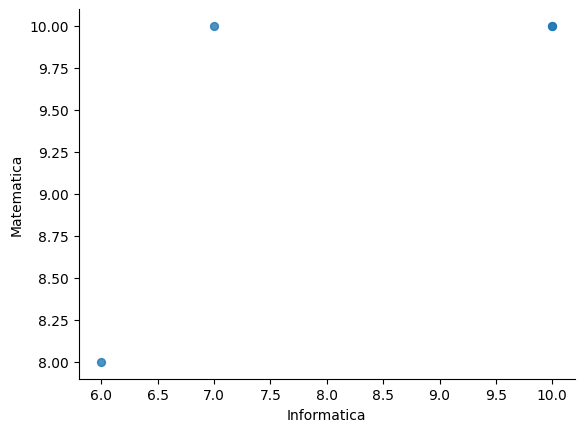

In [61]:
# @title Informatica vs Matematica

from matplotlib import pyplot as plt
scoli_df.plot(kind='scatter', x='Informatica', y='Matematica', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# <u> Numpy  </u>

Numpy este o bibliotecă de bază pentru calculul științific în Python. Ea oferă suport pentru vectori și matrice, împreună cu funcții matematice pentru a opera asupra acestora, precum și funcții de algebra liniară și rezolvare de ecuații.

Există foarte multe funcționalități oferite de numpy, și vă îndrumăm să le explorați pe toate în [Documentația Numpy](https://numpy.org/doc/stable/user/basics.html).

Dintre funcționalitățile utilizate frecvent, putem enumera:
* crearea de vectori și matrice - `np.array()`, `np.zeros()`, `np.ones()`, `np.tril()`, `np.triu()`, `np.arange()`, `np.linspace()`
* operații matematice - `np.add()`, `np.subtract()`, `np.multiply()`, `np.divide()`, `np.dot()`, `np.matmul()` (sau in-line `@`), `np.transpose()` (sau `vector.T`)
* funcții matematice - `np.exp()`, `np.log()`, `np.sin()`, `np.cos()`, `np.tan()`, `np.sqrt()`
* funcții de agregare - `np.sum()`, `np.mean()`, `np.std()`, `np.var()`, `np.max()`, `np.min()`
* funcții de manipulare a formei - `np.reshape()`, `np.concatenate()`, `np.split()`, `np.vstack()`, `np.hstack()`
* funcții de manipulare a dimensiunilor - `np.squeeze()`, `np.unsqueeze()`
* funcții de comparare - `np.equal()`, `np.not_equal()`, `np.greater()`, `np.greater_equal()`, `np.less()`, `np.less_equal()`, `np.all()`, `np.any()`
* funcții de filtrare - `np.where()`, `np.argmax()`, `np.argmin()`
* funcții de randomizare - `np.random.rand()`, `np.random.randn()`, `np.random.randint()`, `np.random.choice()`, `np.random.shuffle()`
* funcții de algebra liniară - `np.linalg.inv()`, `np.linalg.det()`, `np.linalg.eig()`, `np.linalg.svd()`, `np.linalg.solve()`
* funcții de statistici - `np.percentile()`, `np.histogram()`, `np.cov()`, `np.corrcoef()`
* funcții de serializare - `np.save()`, `np.load()`, `np.savez()`, `np.loadz()`
* funcții de manipulare a tipurilor de date - `np.astype()`, `np.asarray()`, `np.copy()`, `np.view()`

Să revenim la exercițiul anterior în care doream să rescalăm notele din intervalul [1, 10] în [1, 5].

Putem rezolva problema matriceal, automat, în locul substituției analitice:

a + b = 1
10a + b = 5

Se poate scrie:

$$
\left(\begin{array}{cc}
1 & 1\\
10 & 1
\end{array}\right)
\left(\begin{array}{cc}
a \\
b
\end{array}\right)
=
\left(\begin{array}{cc}
1 \\
5
\end{array}\right)
$$

În formă matriceală compactă, notăm:

$$Ax = y \implies x = A^{-1}y$$

In [62]:
A = [[1, 1], [10, 1]]
y = [1,5]

# Convertim matricea și vectorul în obiecte din numpy
A = np.array(A)
y = np.array(y)

x = np.linalg.inv(A) @ y.T # L-am facut pe y vector coloana prin transpunere

a, b = x[0], x[1]

a, b

(0.4444444444444445, 0.5555555555555556)

In [63]:
# Pentru a obține dimensiunile unui vector în numpy:
inaltime, latime = A.shape

inaltime, latime

(2, 2)

In [64]:
# Daca vectorul este unidimensional, el va avea o dimensiune goală
# Iar atribuirea inaltime, latime = y.shape va produce o eroare referitoare la numărul de valori pe care vrem să le extragem
y.shape, y.T.shape

((2,), (2,))

In [65]:
# Pentru a obține y de 2 dimensiuni, folosim comanda np.nexaxis, care mai adaugă un rând de parantezări în interiorul vectorului
y = y[:, np.newaxis]
y.shape

(2, 1)

În exemplul următor vom explora capacitatea de slicing oferită de numpy:

In [66]:
# Creăm o matrice 4x4 cu valori de la 1 la 16
X = np.arange(1, 17).reshape(4, 4)

X

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [67]:
# Putem extrage din această matrice cele 2 rânduri de la mijloc și ultimele 3 coloane
X_mic = X[1:3, 1:]

X_mic

array([[ 6,  7,  8],
       [10, 11, 12]])

În numpy, indexarea se face tot de la 0.

Slicing-ul start:stop semnifică colectarea tuturor indecșilor cu proprietatea:
$$start \leq i < stop$$

și poate fi folosit și de la sfârșit spre început folosind indecși negativi și aceeași convenție cu startul inclus și sfârșitul exclus.

În momentul când unul dintre cele două capete lipsește, slicingul va merge până ajunge la capătul dimensiunii `1:` semnifică `start = 1, stop = max_width`

Totodată, aveți mare atenție asupra felului cum folosiți sliceurile, ele sunt transmise prin referință și vor afecta structura din care au fost decupate:

In [68]:
X

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [69]:
# Peste toată dimensiunea X_mic punem 0-uri:
X_mic[:] = 0

X_mic

array([[0, 0, 0],
       [0, 0, 0]])

In [ ]:
X

array([[ 1,  2,  3,  4],
       [ 5,  0,  0,  0],
       [ 9,  0,  0,  0],
       [13, 14, 15, 16]])

Pentru a nu afecta structura lui X, ar trebui să facem o copie persistentă a regiunii decupate:

In [70]:
# Resetăm experimentul
X = np.arange(1, 17).reshape(4, 4)

# realizăm o copie persistentă a lui X pe zona din slicing, folosind metoda deepcopy din librăria copy
X_mic = deepcopy(X[1:3, 1:])

X, X_mic

(array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]]),
 array([[ 6,  7,  8],
        [10, 11, 12]]))

In [71]:
X_mic[:] = 0

X, X_mic

(array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]]),
 array([[0, 0, 0],
        [0, 0, 0]]))

# <u> Funcții  </u>

În Python, în afara variabilelor de bază care sunt transmise prin valoare, toate celelalte sunt transmise prin referință.

Așadar, modificările aduse obiectelor din funcții se propagă ca efecte laterale în afara funcției.

In [72]:
lista_int = list(range(1, 16))

In [73]:
def demo_lateral_tipat(lista : list, elem : int) -> int:
  lista.insert(0, elem)

  return 2*elem

def demo_lateral(lista, elem):
  lista.insert(0, elem)

  return 2*elem

output = demo_lateral_tipat(lista_int, 30)

output, lista_int

(60, [30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

Putem observa sintaxa unei funcții:
* Antetul pornește cu keyword-ul `def`
* Precum în celelalte blocuri de control, creștem identarea cu un tab pentru a semnala apartenența la blocul funcției
* Tipul returnat de funcție este identificat de `-> tip`
* Secvența de cod din funcție se poate termina cu return

Această ultimă observație nu este obligatorie în general. Putem scrie funcții care nu returnează nimic per se, ci se bazează exclusiv pe efect lateral:

In [74]:
def demo_no_return(lista : list):
  lista.append(47)

# Echivalent, putem scrie și:
def demo_no_return(lista : list):
  lista.append(47)
  return

demo_no_return(lista_int)

lista_int

[30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 47]

Dacă executăm:

In [75]:
output = demo_no_return(lista_int)

output, output == None

(None, True)



```
# This is formatted as code
```

Ne dăm seama acum ce se petrece atunci când scriem lista = lista.append(element).

Append este o metoda a clasei List ce realizeaza modificarile asupra obiectului curent prin efect lateral și nu returnează nimic.

**[Good practice]** În general se preferă un coding style în care funcțiile să fie definite fără cod executabil sau doar cu unit teste ce îi vizează comportamentul, și de obicei se definesc helperele și funcția mare în aceeași celulă

Un Bad practice utilizat frecvent în Notebook-uri este reprezentat de utilizarea variabilelor neoferite ca parametru:

In [76]:
def demo_bad_practice(elem : int) -> int:
  return 2*elem + var

demo_bad_practice(3)

11

Funcția are acces la contextul notebook-ului și deși var nu este definit în interiorul său, îl găsește pe cel executat anterior în secțiunea de variabile: `var : int = 5` și îl folosește pe acela.

Deși este foarte la îndemână acest tip de a scrie funcții, încercați să oferiți tot ce aveți nevoie ca parametru, sau să creați clase cu atribute.

Acest coding style ascunde foarte bine erori și vă forțează să aveți o mai mare precauție când rulați celule de mai sus decât nivelul curent al workflow-ului.

___
Dacă dorim să returnăm mai multe valori produse în interiorul funcției, putem folosi următoarea sintaxă:



In [77]:
def demo_multivals(lista):
  return len(lista), min(lista), max(lista)

# Prin pattern matching, fiecarei variabile ii este atribuita o valoare din cele returnate de functie
lungime, minim, maxim = demo_multivals(lista_int)

lungime, minim, maxim

(18, 1, 47)

In [78]:
#Alternativ putem scrie și
valori = demo_multivals(lista_int)

#Și să accesăm elementele din tuplul valori
valori[0], valori[1], valori[2]

(18, 1, 47)

Returnarea de valori multiple se realizează prin crearea unui tuplu.

În limbajul de programare Python, putem defini o funcție care să primească un număr variabil de argumente folosind asteriscul (*) în definiția funcției. În acest caz, argumentele sunt percepute drept un tuplu (care poate avea număr variabil de elemente).

Iată un exemplu simplu:

In [80]:
def functie_cu_numar_variabil_de_argumente(*args):
    for arg in args:
        print(arg)

# Exemplu de utilizare
functie_cu_numar_variabil_de_argumente(1, 2, 3, 'a', 'b')

# Exemplu de apel
lista_argumente = [True, "ana", [1, 2, 3], 1, 'a']
functie_cu_numar_variabil_de_argumente(*lista_argumente)

1
2
3
a
b
True
ana
[1, 2, 3]
1
a


Funcțiile în Python pot avea argumente cu valori implicite, ceea ce înseamnă că aceste argumente primesc o valoare implicită, furnizată atunci când este definită funcția, ce este folosită în cazul în care nu este furnizată o altă valoare în momentul apelului funcției. Acest lucru adaugă flexibilitate și oferă posibilitatea apelării funcției cu un număr mai mic de argumente decât numărul total de parametri.

In [81]:
def suma(x=0, y=1, z=2):
  return x + y + z

print(suma())
print(suma(4))
print(suma(4,5))
print(suma(4,5,6))

3
7
11
15


În Python, putem utiliza cuvinte cheie (keywords) pentru a furniza argumente la apelul funcțiilor. Aceasta permite specificarea valorilor pentru parametri prin numele acestora, fără a depinde strict de ordinea în care aceștia sunt definiți în funcție.

In [ ]:
def my_function(child3, child2, child1):
  print("The youngest child is " + child3)

my_function(child1 = "Emil",
            child2 = "Alex",
            child3 = "Andrei")

def my_function(**kid):
  print("His last name is " + kid["lname"])

my_function(fname = "Andrei", lname = "Popescu")

The youngest child is Andrei
His last name is Popescu


# <u> Tupluri  </u>

Precum ați văzut, pe parcursul laboratorului, tuplurile sunt obiecte similare listelor, dar sunt imutabile.

In [82]:
tuplu_error = (1,2,3)
tuplu_error[0] = 4


TypeError: 'tuple' object does not support item assignment

Primim eroarea care ne spune că obiectul de tip tuplu nu suportă modificarea elementelor.

În cazul suprascrierii tuplului, se va crea un nou obiect de tip tuplu, care va fi alocat într-o nouă zonă de memorie, iar (1, 2, 3) va fi marcat pentru garbage collection.

In [ ]:
tuplu_error = (1,2,3, [4,5,6])

# Putem modifica în cadrul listei din tuplu, deoarece acesta reține referința către ea, iar valorile din listă sunt mutabile
tuplu_error[3][0] = 7

Principalele moduri în care întâlnim tuplurile sunt:
* Tuplurile rezultate din operatii de zip, enumerate, items ale unor dicționare
* Memoizarea unei colecții de metrici corespunzătoare rulării curente a unui algoritm.
* Returnarea mai multor valori dintr-o funcție

Luăm numele și notele studenților de la exemplul anterior:

In [83]:
lista_tupluri_note = list(note_dict.items())

lista_tupluri_note

[('Mihai', 10),
 ('Andreea', 10),
 ('Andrei', 8),
 ('Marcela', 7),
 ('Rodica', 9),
 ('Catalin', 8)]

Cu ajutorul unei expresii lambda, putem să sortăm lista de tupluri în funcție de un anumit criteriu, în cazul nostru, nota.

In [84]:
lista_tupluri_note_sortate = sorted(lista_tupluri_note, key=lambda x: x[1]) # Pentru o sortare descrescătoare, putem folosi argumentul reverse=True

lista_tupluri_note_sortate

[('Marcela', 7),
 ('Andrei', 8),
 ('Catalin', 8),
 ('Rodica', 9),
 ('Mihai', 10),
 ('Andreea', 10)]

Pentru cea de-a doua funcționalitate a tuplurilor, o bibliotecă foarte utilă este reprezentată de `pickle`, care are rolul de a serializa obiecte Python, pentru a le salva în fișiere binare pe disc și a le reîncărca ulterior.

In [85]:
metrica1 = np.linspace(0, 1, 10)
metrica2 = np.random.rand(10)
metrica3 = np.sin(np.linspace(0, 2*np.pi, 10))

In [87]:
metrica1, metrica2, metrica3

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([0.22116454, 0.94145037, 0.39659419, 0.71883335, 0.37877939,
        0.09950797, 0.14448819, 0.60922841, 0.24503844, 0.91798166]),
 array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
         3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
        -6.42787610e-01, -2.44929360e-16]))

In [88]:
# Scriem datele într-un fișier binar sub formă de tuplu
with open('metrici.pkl', 'wb') as f:
    pkl.dump((metrica1, metrica2, metrica3), f)

In [89]:
with open('metrici.pkl', 'rb') as f:
    m1, m2, m3 = pkl.load(f) # Citim datele din fișierul binar, corespunzătoare array-urilor metrica1, metrica2, metrica3

In [90]:
# np.all face și logic între toate elementele arrayului de boolene rezultat din comparația elementelor array-urilor
np.all(m1 == metrica1), np.all(m2 == metrica2), np.all(m3 == metrica3)

(True, True, True)

# Exerciții cu liste [60p]

1. Implementați o funcție care determină și returnează elementul minim dintr-o listă cu numere primită ca parametru.

In [94]:
def minim(lista):
  if not lista:
    return None

  return reduce(lambda acc, elem: min(acc, elem), lista_numerica, lista[0])

lista_numerica = [2, 8, 5, 1, 7, 3]
rezultat = minim(lista_numerica)
print("Elementul minim din lista este:", rezultat) # Rezultatul așteptat este: 1

rezultat = minim([])
print("Elementul minim din lista este:", rezultat)

Elementul minim din lista este: 1
Elementul minim din lista este: None


2. Implementați o funcție care determină numărul de numere pare dintr-o listă de numere primită ca argument.

In [99]:
def pare(lista):
  return len(list(filter(lambda x: x % 2 == 0, lista)))

nr_pare = pare(lista_numerica)
print("Numarul de numere pare din lista este:", nr_pare) # Rezultatul așteptat este: 2

Numarul de numere pare din lista este: 2


3. Implementați o funcție care primește ca argument o listă și returnează lista cu toate prefixele ei.

In [102]:
def prefixe_lista(lista):
  current = []
  result = []

  for number in lista:
    current.append(number)
    result.append(deepcopy(current))

  return result


rezultat = prefixe_lista(lista_numerica)
print("Prefixele listei sunt:", rezultat) # Rezultatul așteptat: [[2], [2, 8], [2, 8, 5], [2, 8, 5, 1], [2, 8, 5, 1, 7], [2, 8, 5, 1, 7, 3]]

Prefixele listei sunt: [[2], [2, 8], [2, 8, 5], [2, 8, 5, 1], [2, 8, 5, 1, 7], [2, 8, 5, 1, 7, 3]]


4. Implementați o funcție care primește ca argument o listă cu numere întregi și întoarce două liste:
- o listă cu elementele pare din lista primită ca argument (sortate crescător și fără duplicate);
- o listă cu elementele impare din lista primită ca argument (sortate descrescător și fără duplicate).


In [131]:
def sub_liste(lista):
  even = list(set(list(filter(lambda x: x % 2 == 0, lista))))
  even.sort()

  odd = list(set(list(filter(lambda x: x % 2 == 1, lista))))
  odd.sort(reverse = True)

  return even, odd

lista_pare, lista_impare = sub_liste([1, 1, 2, 7, 3, 9, 8, 3, 2, 4, 100, 21, 32, 42])
print("Lista cu elementele pare: ", lista_pare)
print("Lista cu elementele impare: ", lista_impare)

Lista cu elementele pare:  [2, 4, 8, 32, 42, 100]
Lista cu elementele impare:  [21, 9, 7, 3, 1]


# Exerciții compuse [20p]

5. Implementați o funcție care primește ca argumente două numere naturale, $n$ și $k$, și afișează toate perechile de numere naturale $(a, b)$ cu proprietatea că $10 < a < b \le n$ și $a + b$ este divizibil cu $k$.

In [115]:
def perechi(n, k):
  return [(a, b) for a in range(11, n + 1) for b in range(11, n + 1) if a < b and (a + b) % k == 0]

perechi(14, 5) # Rezultatul așteptat: (11, 14) și (12, 13)

[(11, 14), (12, 13)]

6. Implementați o funcție care primește un text și un prag k și returnează cuvintele care apar de minim k-ori ordonate crescător (Adaptare Interviu Adobe 2023)

In [130]:
def cuvinte_peste_prag(text : str, k : int) -> list[str]:
  # TODO: Eliminați semnele de punctuație
  no_punctuation_text = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace(), text))

  # TODO: Tokenizați stringul curent
  tokens = no_punctuation_text.split(" ")

  # TODO: Numărați cu ajutorul unui dicționar frecvențele de apariție ale cuvintelor
  _dict = {}

  for token in tokens:
    if token not in _dict.keys():
      _dict[token] = 1
    else:
      _dict[token] += 1

  # TODO: Ordonați crescător lista de cuvinte și frecvențe după frecvențe
  sorted_values = sorted(_dict.items(), key=lambda x: x[1])

  # TODO: Extrageți cuvintele din lista de tupluri ordonate
  return [a[0] for a in sorted_values if a[1] >= k]


text = "un caine e mai mic decat un om, dar un om e mult mai putin prietenos decat un caine"
k = 2

rezultat = cuvinte_peste_prag(text, k)
print(f"Cuvintele care apar de minim {k}-ori sunt:", rezultat) # Rezultatul așteptat: ['caine', 'e', 'mai', 'decat', 'om', 'un']

Cuvintele care apar de minim 2-ori sunt: ['caine', 'e', 'mai', 'decat', 'om', 'un']
